In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

trainset = torchvision.datasets.MNIST(root='data',train=True,download=True,transform = transform)
testset = torchvision.datasets.MNIST(root='data',train = False,download=True,transform=transform)


In [4]:
from torch.utils.data import DataLoader

# Tạo DataLoader cho tập huấn luyện và tập kiểm thử
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

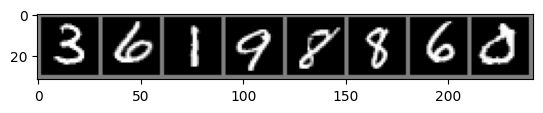

Label tương ứng:     3     6     1     9     8     8     6     0


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img*0.5 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    imshow(torchvision.utils.make_grid(images[:8]))  
    print('Label tương ứng:', ' '.join('%5s' % labels[j].item() for j in range(8)))
    break

In [6]:
images.shape

torch.Size([64, 1, 28, 28])

In [7]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.GELU(),
    nn.Linear(256,64),
    nn.GELU(),
    nn.Linear(64,10)
    
)
model = model.to(device)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): GELU(approximate='none')
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): GELU(approximate='none')
  (5): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
input_tensor = torch.rand(5, 28, 28).to(device) # shape ảnh = 28x28
output = model(input_tensor)
print(output.shape)

torch.Size([5, 10])


In [9]:
compute_loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [10]:
epochs = 20
losses = []

for i in range(epochs):
    running_loss = 0.0
    for images,labels in trainloader:
        optimizer.zero_grad()
        
        output = model(images)
        loss = compute_loss(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epochs_loss = running_loss / len(trainloader)
    losses.append(epochs_loss)
    print(f'Epoch [{i+1}/{epochs}], Loss: {epochs_loss:.4f}')

Epoch [1/20], Loss: 0.3029
Epoch [2/20], Loss: 0.1369
Epoch [3/20], Loss: 0.1046
Epoch [4/20], Loss: 0.0835
Epoch [5/20], Loss: 0.0717
Epoch [6/20], Loss: 0.0627


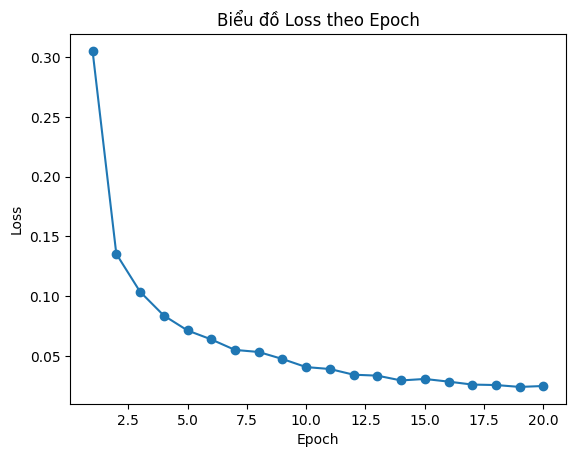

In [70]:
plt.plot(range(1, epochs+1), losses, marker='o')
plt.title('Biểu đồ Loss theo Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

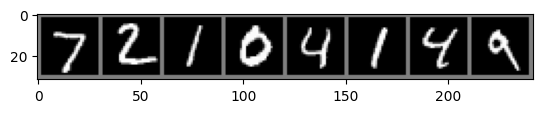

Label thực:         7     2     1     0     4     1     4     9
Label dự đoán:      7     2     1     0     4     1     4     9


In [71]:
# Lấy một số mẫu từ tập kiểm thử
dataiter = iter(testloader)
images, labels = next(dataiter)

# Dự đoán với mô hình đã huấn luyện
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Hiển thị hình ảnh cùng với label thực và dự đoán
imshow(torchvision.utils.make_grid(images[:8]))
print('Label thực:    ', ' '.join('%5s' % labels[j].item() for j in range(8)))
print('Label dự đoán: ', ' '.join('%5s' % predicted[j].item() for j in range(8)))

In [72]:
loss = 0
total = 0

with torch.no_grad():
    for images,labels in testloader:
        output = model(images)
        
        _, predicted = torch.max(output.data , 1)
        total += labels.size(0)
        loss += (predicted == labels).sum().item()
print(f'Độ chính xác trên tập kiểm thử: {100 * loss / total:.2f}%')

Độ chính xác trên tập kiểm thử: 97.67%
